# Santander Product Recommendation

# Import data:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 60
import numpy as np

In [2]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier

In [3]:
df=pd.read_csv("NewBank.csv",nrows=500000)
#df.set_index('ncodpers',inplace=True)

In [4]:
#data = pd.get_dummies(df,prefix=['segmento'], columns = ['segmento'], drop_first=True)

# Fixing the data:

## Create dummies features:

In [5]:
col_list=['ind_empleado','segmento','sexo','tiprel_1mes','indresi','indext','indfall']
for col in col_list:
     df = pd.get_dummies(df,prefix=None, columns = [col], drop_first=True) 
df = pd.get_dummies(df, columns = ['ind_actividad_cliente'], drop_first=True)   
df.rename(columns={'ind_actividad_cliente_1.0': 'ind_actividad_cliente'}, inplace=True)

## Drop unuseful columns and fillna the binary products columns

In [6]:
df.drop(['ind_ctju_fin_ult1','ult_fec_cli_1t','conyuemp','tipodom','indrel_1mes',\
         'pais_residencia','fecha_alta','canal_entrada','cod_prov','fecha_dato','ncodpers'],inplace=True,axis=1)

#here i inpute zero because it wasn't a lot of Nan:
df.ind_nomina_ult1.fillna(0,inplace=True)
df.ind_nom_pens_ult1.fillna(0,inplace=True)
df.ind_nom_pens_ult1.fillna(0,inplace=True)
df.antiguedad.fillna(0,inplace=True)
df=df[df['antiguedad']>0] #because i found weird values like -9999

## Changing data type for some columns:

In [7]:
df['ind_nomina_ult1']=df['ind_nomina_ult1'].astype(np.int64)
df['ind_nom_pens_ult1']=df['ind_nom_pens_ult1'].astype(np.int64)

# General EDA:

In [8]:
df.describe()

,Unnamed: 0,age,ind_nuevo,antiguedad,indrel,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,ind_empleado_B,ind_empleado_F,ind_empleado_N,ind_empleado_S,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO,sexo_V,tiprel_1mes_I,indresi_S,indext_S,indfall_S,ind_actividad_cliente
count,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,4.170480e+05,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.00000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000
mean,249999.026308,38.598646,0.000112,78.344077,1.000392,1.321726e+05,0.000124,0.000030,0.808003,0.000392,0.092329,0.014588,0.151426,0.045283,0.001918,0.002154,0.052159,0.093829,0.022036,0.007278,0.012402,0.002744,0.054507,0.053741,0.031950,0.004688,0.061109,0.068101,0.150246,0.00038,0.000278,0.999080,0.000002,0.511793,0.441012,0.539632,0.492287,0.994942,0.042495,0.002054,0.525835
std,144337.613521,16.861572,0.010582,69.257616,0.196001,2.281477e+05,0.011135,0.005477,0.393871,0.019795,0.289491,0.119898,0.358464,0.207924,0.043753,0.046362,0.222347,0.291591,0.146802,0.085001,0.110672,0.052312,0.227015,0.225506,0.175868,0.068309,0.239530,0.251919,0.357313,0.01949,0.016671,0.030318,0.001414,0.499861,0.496509,0.498427,0.499941,0.070940,0.201715,0.045275,0.499333
min,0.000000,2.000000,0.000000,1.000000,1.000000,1.202730e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124999.000000,24.000000,0.000000,22.000000,1.000000,6.772608e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,250000.000000,35.000000,0.000000,44.000000,1.000000,1.001770e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,374998.000000,49.000000,0.000000,156.000000,1.000000,1.537020e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,499999.000000,116.000000,1.000000,246.000000,99.000000,2.889440e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.ind_fond_fin_ult1.value_counts('normalize')

0    0.977964
1    0.022036
Name: ind_fond_fin_ult1, dtype: float64

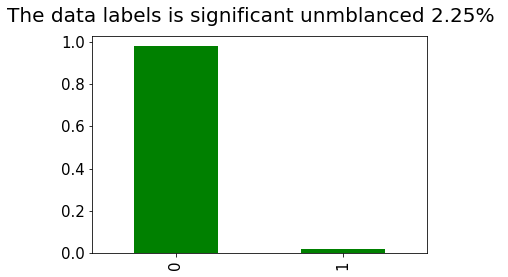

In [10]:
title='The data labels is significant unmblanced 2.25% '
fig = plt.figure()
fig.suptitle(title, fontsize=20)
df.ind_fond_fin_ult1.value_counts('normalize').plot.bar(color='green',fontsize = 15)

In [11]:
df.groupby('nomprov')['renta'].mean().reset_index().sort_values(by='renta',ascending=False).head(10)

,nomprov,renta
15,CEUTA,207341.871967
30,MADRID,182286.861447
7,"BALEARS, ILLES",167206.400749
8,BARCELONA,165055.599787
9,BIZKAIA,157724.190000
32,MELILLA,149793.782055
21,GIRONA,144255.834764
31,MALAGA,121037.431448
13,CANTABRIA,119247.226841
43,SEVILLA,117217.201027


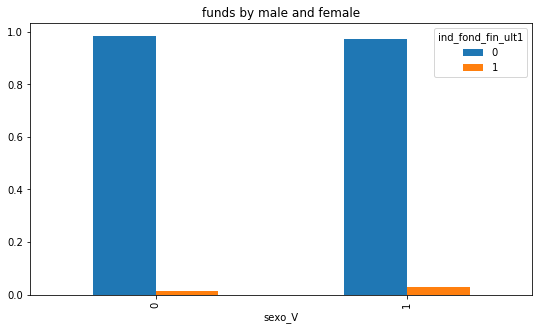

In [12]:
pd.crosstab(index=df['sexo_V'],values=df['ind_fond_fin_ult1'], columns=df['ind_fond_fin_ult1'],
            aggfunc='count',normalize='index').plot.bar(title='funds by male and female',figsize=(9,5)).fontsize=15

We can see that in the man accounts compare to woman acounts holder there is more fonds product

In [13]:
fond_renta=df[(df.ind_actividad_cliente==1)|(df.ind_plan_fin_ult1==1)|(df.ind_valo_fin_ult1==1)|(df.ind_ecue_fin_ult1==1)|(df.ind_dela_fin_ult1==1)|(df.ind_fond_fin_ult1==1)].renta.mean()
NoFond_renta=df[(df.ind_actividad_cliente==0)|(df.ind_plan_fin_ult1==0)|(df.ind_valo_fin_ult1==0)|(df.ind_ecue_fin_ult1==0)|(df.ind_dela_fin_ult1==0)|(df.ind_fond_fin_ult1==0)].renta.mean()

df.loc[df.ind_fond_fin_ult1==0,'renta']=df.loc[df.ind_fond_fin_ult1==0,'renta'].fillna(NoFond_renta)
df.loc[df.ind_fond_fin_ult1==1,'renta']=df.loc[df.ind_fond_fin_ult1==1,'renta'].fillna(fond_renta)

In [14]:
df['renta']=df['renta']/100
df['renta']=df['renta'].astype(np.int64)

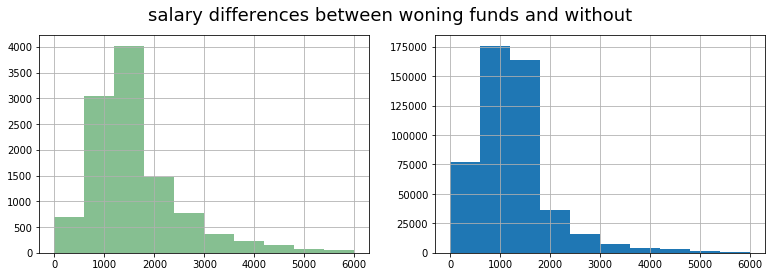

In [15]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('salary differences between woning funds and without',size=18)
#plt.gca().set_title('no fund')
df[df.ind_fond_fin_ult1==1].renta.hist(range=[0, 6000],ax=axes[0],color='#86bf91',figsize=(13,4)) 
df[df.ind_fond_fin_ult1==0].renta.hist(range=[0, 6000],ax=axes[1]) 

We can see that tha distribution in the population that have "funds" has higher renta...

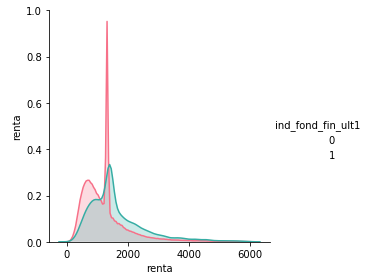

In [16]:
sns.pairplot((df[df.renta<6000]), vars=['renta'], hue='ind_fond_fin_ult1',size=4,palette="husl")

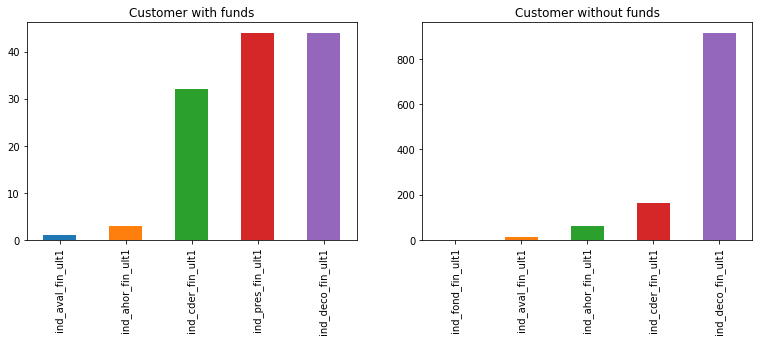

In [17]:
fig, axes = plt.subplots(1, 2)

(df.reset_index().iloc[:,8:31]).loc[df.reset_index().iloc[:,8:31].ind_fond_fin_ult1==1].\
sum(axis=0).sort_values().head().plot(kind='bar',ax=axes[0],figsize=(13,4),title='Customer with funds')

(df.reset_index().iloc[:,8:31]).loc[df.reset_index().iloc[:,8:31].ind_fond_fin_ult1==0].\
sum(axis=0).sort_values().head().plot(kind='bar',ax=axes[1],figsize=(13,4),title='Customer without funds')


we can see hear the top 5 products holding

Find the top 10 correlated features:

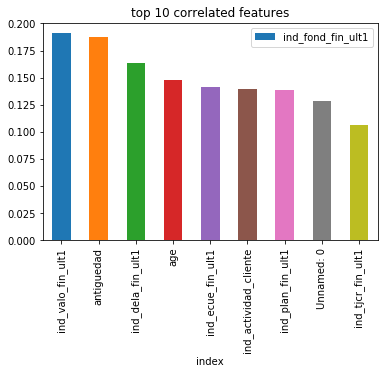

In [18]:
df.corr().loc[ 'ind_fond_fin_ult1' , : ].reset_index().sort_values('ind_fond_fin_ult1',ascending=False).head(10).iloc[1:11,:].plot.bar(title='top 10 correlated features',x='index', y='ind_fond_fin_ult1')

## Heat map correlated features:

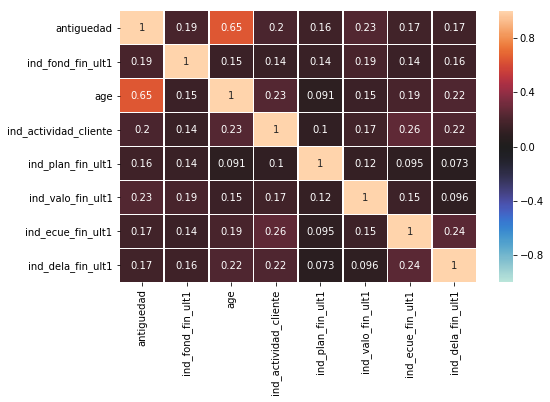

In [19]:
#sns.pairplot(ndf[['antiguedad','ind_fond_fin_ult1','age','renta']],hue='ind_fond_fin_ult1')
fig, ax = plt.subplots(figsize=(8,5))  
sns.heatmap(df[['antiguedad','ind_fond_fin_ult1','age','ind_actividad_cliente','ind_plan_fin_ult1','ind_valo_fin_ult1','ind_ecue_fin_ult1','ind_dela_fin_ult1']].corr(),linewidths=.5, annot = True, vmin=-1, vmax=1, center= 0,ax=ax)

In [20]:
#df.renta.hist()
import matplotlib.pyplot as plt
import numpy as np

# Eda for the population that have funds:

In [21]:
df_funds=df.loc[df.ind_fond_fin_ult1==1]

We can see here top 10 product that customers with fund have:

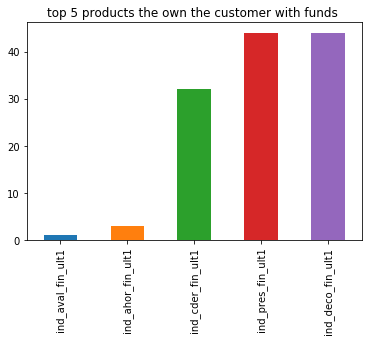

In [22]:
df_funds.reset_index().iloc[:,8:31].drop('ind_fond_fin_ult1',axis=1)\
.sum().sort_values().head(5).plot.bar(title='top 5 products the own the customer with funds ')

### Top 5 cities with most customers that have funds:

In [23]:
df.pivot_table(index='nomprov',columns='ind_fond_fin_ult1',values='renta',aggfunc='mean').head(10).sort_values(by=1,ascending=False)

ind_fond_fin_ult1,0,1
nomprov,,
"BALEARS, ILLES",1527.132217,1829.359551
BARCELONA,1602.057512,1772.043435
ALAVA,1321.000000,1412.000000
BIZKAIA,1321.051990,1412.000000
ASTURIAS,1059.562639,1196.458564
ALMERIA,941.236477,1086.187500
ALICANTE,964.617537,1041.509434
ALBACETE,871.388901,1030.111111
AVILA,869.814644,957.500000


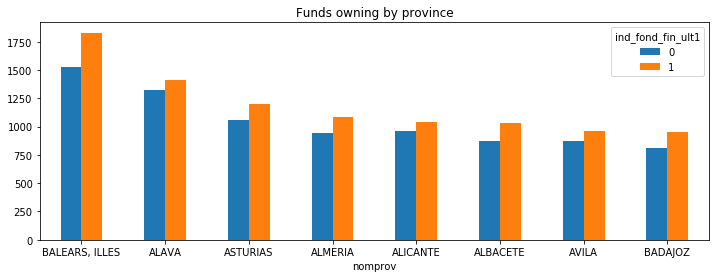

In [24]:
df.pivot_table(index='nomprov',columns='ind_fond_fin_ult1',values='renta',aggfunc='mean').head(8).sort_values(by=1,ascending=False).plot.bar(title='Funds owning by province',rot=0,figsize=(12,4))

we can see in the bar plot the mean rents in every city with fonds and without fonds and we can see the big gap in balears

In [25]:
bins = [0,12,60,119,160,198,246]
labels=[0,1,2,3,4,5]
df_funds['bins_antiguedad'] = pd.cut(df_funds['antiguedad'], bins=bins, labels=labels, include_lowest=True)

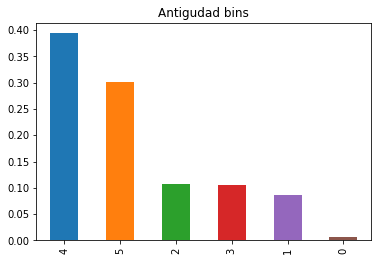

In [26]:
df_funds.bins_antiguedad.value_counts("normalize").plot.bar(title='Antigudad bins')

 we can see that Distribution of the antiguedad is quiet  balanced...

In [27]:
bins = [0,20,25,30,40,50,67,85,117]
labels=[0,1,2,3,4,5,6,7]
df_funds['bins_age'] = pd.cut(df_funds['age'], bins=bins, labels=labels, include_lowest=True)

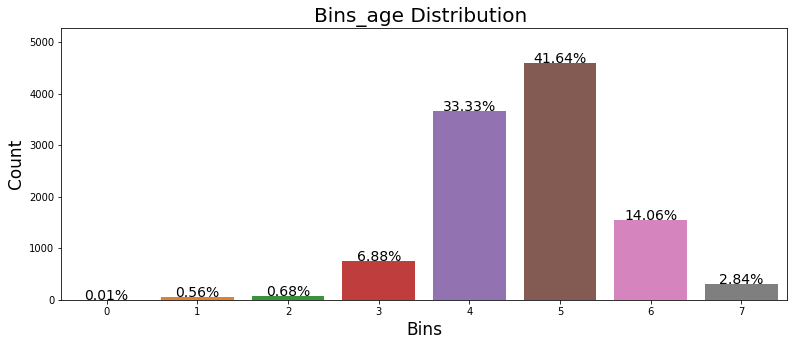

In [28]:
total = len(df_funds)
plt.figure(figsize=(13,17))

plt.subplot(311)
g = sns.countplot(x="bins_age", data=df_funds)
g.set_title("Bins_age Distribution ", fontsize=20)
g.set_ylabel("Count",fontsize= 17)
g.set_xlabel("Bins", fontsize=17)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15)
plt.show()

the Distribution in the age is telling us that most of the customers that have funds are in bin 3 and 4 which is 40-50 or 50-67

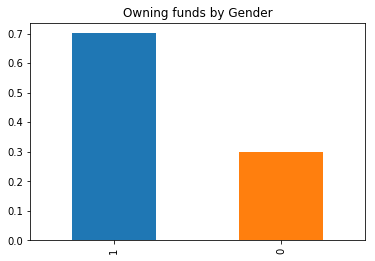

In [29]:
df_funds.sexo_V.value_counts("normalize").plot.bar(title='Owning funds by Gender')

# Preprocecsing the data:

# Spliting the data

In [30]:
#i drop the categorial columns that i didnt succeed to to cast to numric:
df.drop('nomprov', axis=1,inplace=True)

In [31]:
X = df.drop('ind_fond_fin_ult1', axis=1)
y=df['ind_fond_fin_ult1']

In [32]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.85)

# Create new features with the split data:

1. Create salary raise slope level measure 
2. Create "saving" ordinal level measure
3. Create credit rank meausre
4. all this new features can help us to predict the binary class...

## Imputation-Filling of missing values with the mean():

In [33]:
train=pd.concat([X_train,y_train],axis=1)

fond_renta=train[(train.ind_actividad_cliente==1)|(train.ind_plan_fin_ult1==1)\
                 |(train.ind_valo_fin_ult1==1)|(train.ind_ecue_fin_ult1==1)|\
                 (train.ind_dela_fin_ult1==1)|(train.ind_fond_fin_ult1==1)].renta.mean()
NoFond_renta=train[(train.ind_actividad_cliente==0)|(train.ind_plan_fin_ult1==0)\
                   |(train.ind_valo_fin_ult1==0)|(train.ind_ecue_fin_ult1==0)|\
                   (train.ind_dela_fin_ult1==0)|(train.ind_fond_fin_ult1==0)].renta.mean()

train.loc[train.ind_fond_fin_ult1==0,'renta']=train.loc[train.ind_fond_fin_ult1==0,'renta'].fillna(NoFond_renta)
train.loc[train.ind_fond_fin_ult1==1,'renta']=train.loc[train.ind_fond_fin_ult1==1,'renta'].fillna(fond_renta)


In [34]:
test=pd.concat([X_test,y_test],axis=1)

fond_renta=test[(test.ind_actividad_cliente==1)|(test.ind_plan_fin_ult1==1)|\
                (test.ind_valo_fin_ult1==1)|(test.ind_ecue_fin_ult1==1)|\
                (test.ind_dela_fin_ult1==1)|(test.ind_fond_fin_ult1==1)].renta.mean()
NoFond_renta=test[(test.ind_actividad_cliente==0)|(test.ind_plan_fin_ult1==0)\
                  |(test.ind_valo_fin_ult1==0)\
        |(test.ind_ecue_fin_ult1==0)|(test.ind_dela_fin_ult1==0)|(test.ind_fond_fin_ult1==0)].renta.mean()

test.loc[test.ind_fond_fin_ult1==0,'renta']=test.loc[test.ind_fond_fin_ult1==0,'renta'].fillna(NoFond_renta)
test.loc[test.ind_fond_fin_ult1==1,'renta']=test.loc[test.ind_fond_fin_ult1==1,'renta'].fillna(fond_renta)

In [35]:
X_train=train.drop('ind_fond_fin_ult1', axis=1)
y_train=train['ind_fond_fin_ult1']
#test:
X_test=test.drop('ind_fond_fin_ult1', axis=1)
y_test=test['ind_fond_fin_ult1']

## Blancing the train dataset:

In [36]:
train_1=X_train[y_train==1]

In [37]:
train_0=X_train[y_train==0].sample(n=5800,random_state=0)

In [38]:
#Validation dataset:
X_valid_r, X_valid_r, y_train_r, y_test_r = \
    train_test_split(X_test, y_test, train_size=0.5)

In [39]:
x_train=pd.concat([train_0,train_1],axis=0).sort_index()

In [40]:
y_train=y_train[y_train.index.isin(x_train.index)].sort_index()

# XgBoost:

In [41]:
X = x_train
y = y_train
xgb_model = xgb.XGBClassifier(max_depth=5)
xgb_model.fit(X, y)
y_pred_train = xgb_model.predict(X)
y_pred=xgb_model.predict(X_test)

In [42]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
pd.DataFrame(cm,
             index=xgb_model.classes_,
             columns=xgb_model.classes_)

,0,1
0,57572,15749
1,44,1634


In [43]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn

# KNN

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
x_train_knn=sc.fit_transform(x_train)
X_test_knn=sc.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
X = x_train_knn
y = y_train
knn.fit(X, y)
y_train_pred = knn.predict(X)
y_pred = knn.predict(X_test_knn)

In [47]:
#param_grid = [{'n_neighbors': [ 3, 4,5,6,7,8]}]
#gs = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
#gs.fit(x_train, y_train)

In [48]:
#print(gs.best_params_ )
#print(gs.best_estimator_)
#print(gs.bes)

## Y_pred:

In [49]:
results = confusion_matrix(y_test, y_pred,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

,0,1
0,56462,16859
1,126,1552


In [50]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     73321
           1       0.08      0.92      0.15      1678

   micro avg       0.77      0.77      0.77     74999
   macro avg       0.54      0.85      0.51     74999
weighted avg       0.98      0.77      0.85     74999



# DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(x_train,y_train)

In [52]:
y_pred = classifier.predict(X_test)
#y_pred_train = classifier.predict(x_train)

In [53]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.6630755076734356


## Y_pred:

In [54]:
results = confusion_matrix(y_test, y_pred,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

,0,1
0,48068,25253
1,16,1662


In [55]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79     73321
           1       0.06      0.99      0.12      1678

   micro avg       0.66      0.66      0.66     74999
   macro avg       0.53      0.82      0.45     74999
weighted avg       0.98      0.66      0.78     74999



## RandomForestClassifier:

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)   
clf.fit(x_train,y_train)
y_pred=clf.predict(X_test)

## Y_pred:

In [57]:
results = confusion_matrix(y_test, y_pred,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

,0,1
0,51045,22276
1,37,1641


In [58]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     73321
           1       0.07      0.98      0.13      1678

   micro avg       0.70      0.70      0.70     74999
   macro avg       0.53      0.84      0.47     74999
weighted avg       0.98      0.70      0.81     74999



## Grid search:

In [59]:
param_grid = [{'max_depth': [1, 2, 3, 4,5], 'min_samples_split': [2,3,4], 'criterion' : ['gini', 'entropy']},]
gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print(gs.best_params_ )
print(gs.best_estimator_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 4}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


## Feature_importances:

In [61]:
importances = classifier.feature_importances_

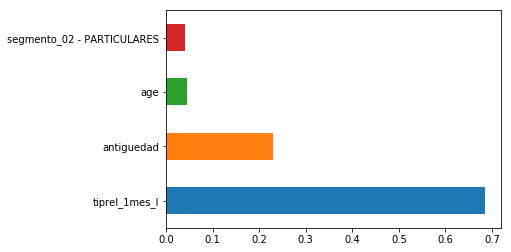

In [62]:
%matplotlib inline          
(pd.Series(classifier.feature_importances_, index=x_train.columns)
   .nlargest(4)
   .plot(kind='barh')) 

# Logistic regression:

In [63]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(x_train)

# Y_pred:

### Train:

In [65]:
results = confusion_matrix(y_train, y_pred_train,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

,0,1
0,2258,3542
1,1005,8335


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      5800
           1       0.70      0.89      0.79      9340

   micro avg       0.70      0.70      0.70     15140
   macro avg       0.70      0.64      0.64     15140
weighted avg       0.70      0.70      0.68     15140



### Test:

In [67]:
results = confusion_matrix(y_test, y_pred,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

,0,1
0,28922,44399
1,188,1490


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.39      0.56     73321
           1       0.03      0.89      0.06      1678

   micro avg       0.41      0.41      0.41     74999
   macro avg       0.51      0.64      0.31     74999
weighted avg       0.97      0.41      0.55     74999



## Final conclusion:

The conclusion from the classification_report we can see that our recall in class 1 is:62% what mean that most of the positive observations we correctly identify but we waste alot of resources because only 9% from our predications labeld as  positive.

In [70]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_pred)
pd.DataFrame(cm,
             index=xgb_model.classes_,
             columns=xgb_model.classes_)

,0,1
0,28922,44399
1,188,1490


In [71]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn

# DecisionTreeClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3,criterion='gini',min_samples_split= 2,min_weight_fraction_leaf=0.0)
classifier = classifier.fit(x_train,y_train)

In [73]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(x_train)

In [74]:
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.6629555060734144


## Y_pred:

In [ ]:
results = confusion_matrix(y_test, y_pred,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

## RandomForestClassifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)   
clf.fit(x_train,y_train)
y_pred=clf.predict(X_test)

## Y_pred:

In [ ]:
results = confusion_matrix(y_test, y_pred,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

## Grid search:

In [ ]:
param_grid = [{'max_depth': [1, 2, 3, 4,5], 'min_samples_split': [2,3,4], 'criterion' : ['gini', 'entropy']},]
gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)

In [ ]:
gs.fit(x_train, y_train)

In [ ]:
print(gs.best_params_ )
print(gs.best_estimator_)

## Feature_importances:

In [ ]:
importances = classifier.feature_importances_

In [ ]:
%matplotlib inline          
(pd.Series(classifier.feature_importances_, index=x_train.columns)
   .nlargest(4)
   .plot(kind='barh')) 

# Logistic regression:

In [ ]:
clf = LogisticRegression(C=100,random_state=0)

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(x_train)

# Y_pred:

### Train:

In [ ]:
results = confusion_matrix(y_train, y_pred_train,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train, labels=[0,1]))

### Test:

In [ ]:
results = confusion_matrix(y_test, y_pred,labels=[0,1]) 
pd.DataFrame(results,index=[0,1],columns=[0,1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

# Results and conclusions

The conclusion from the classification_report we can see that our recall in class 1 is:62% what mean that most of the positive observations we correctly identify but we waste alot of resources because only 9% from our predications labeld as  positive.